## Case: predict canada's per capital income in 2020.  

## Predict the per capita income of canada citizen in year 2020



years = Independent variable

per capita income = dependent

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn import linear_model

In [2]:
#reading in the data
canada_per_capita_income = pd.read_csv(r"C:\Users\EliteBook\Desktop\WTCF23\Data Set\canada_per_capita_income.csv")
canada_per_capita_income.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [3]:
#creating desired column names
canada_per_capita_income.columns = ["year", "per_capita_income"]
canada_per_capita_income.head()

,year,per_capita_income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [4]:
#canada_per_capita_income.rename({"per capita income" : "per_capita_income"}, inplace = True)

In [5]:
#checking the shape of the data
canada_per_capita_income.shape

(47, 2)

In [6]:
#a function to easily get insight on null values, data types etc
def explore():
    explore = pd.DataFrame(index = canada_per_capita_income.columns)
    explore["null values"] = canada_per_capita_income.isnull().sum()
    explore["data types"] = canada_per_capita_income.dtypes
    explore["duplicates"] = canada_per_capita_income.duplicated().sum()
    explore["size"] = canada_per_capita_income.size
    return explore
explore()

,null values,data types,duplicates,size
year,0,int64,0,94
per_capita_income,0,float64,0,94


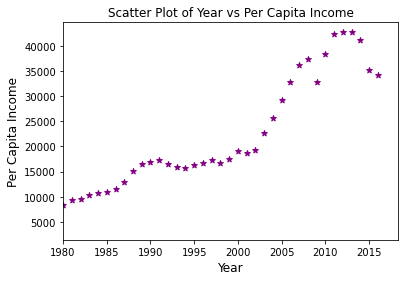

In [7]:
#checking for a linear relationship between the variables
plt.scatter(canada_per_capita_income["year"], canada_per_capita_income["per_capita_income"], marker = "*", color = "purple")
plt.xlabel("Year", fontsize = 12)
plt.ylabel("Per Capita Income", fontsize = 12)
plt.title("Scatter Plot of Year vs Per Capita Income")
#plt.ylim(45000)
plt.xlim(1980)
plt.show()

In [8]:
#creating the model
model = linear_model.LinearRegression()
model.fit(canada_per_capita_income[["year"]], canada_per_capita_income[["per_capita_income"]])

LinearRegression()

In [9]:
#print("The slope of the model is ",model.coef_)
#print("The intercept is ", model.intercept_)

In [10]:
#Basically zip joins items into one container
#model intercept and coeffient
list(zip(model.intercept_, model.coef_))

[(-1632210.7578554575, array([828.46507522]))]

In [11]:
#years to be predicted
predict_years = pd.DataFrame({"years": np.arange(2020, 2067)})
predict_years.head()

,years
0,2020
1,2021
2,2022
3,2023
4,2024


In [12]:
#defining a function to contain the model for easy use
def per_capita(x):
    p = model.predict(x)
    return p

In [13]:
#predicted years and predicted per capita income
canada_per_capita_income["years_to_predict"] = predict_years["years"]
canada_per_capita_income["predicted_per_capita_income"] = per_capita(predict_years)

In [14]:
canada_per_capita_income.head(10)

,year,per_capita_income,years_to_predict,predicted_per_capita_income
0,1970,3399.299037,2020,41288.694094
1,1971,3768.297935,2021,42117.159170
2,1972,4251.175484,2022,42945.624245
3,1973,4804.463248,2023,43774.089320
4,1974,5576.514583,2024,44602.554395
5,1975,5998.144346,2025,45431.019471
6,1976,7062.131392,2026,46259.484546
7,1977,7100.126170,2027,47087.949621
8,1978,7247.967035,2028,47916.414696
9,1979,7602.912681,2029,48744.879771


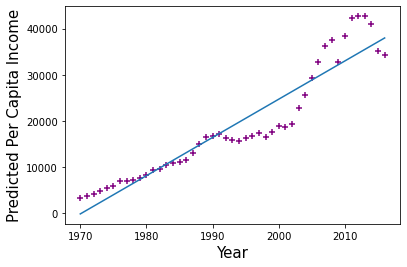

In [15]:
#graph of predicted per capita income
plt.scatter(canada_per_capita_income["year"], canada_per_capita_income["per_capita_income"], marker = "+", color = "purple")
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Predicted Per Capita Income", fontsize = 15)

#This plots a line throught your points (basically we could say it uses the eyeball fitting method)
#plt.plot (x, y, "o") by default it's a straight line as shown below
plt.plot(canada_per_capita_income["year"], model.predict(canada_per_capita_income[["year"]]))
plt.show()

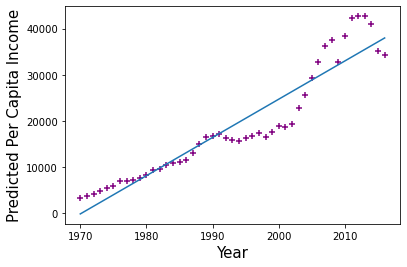

In [16]:
#This finds the least square fit for the graph
plt.scatter(canada_per_capita_income["year"], canada_per_capita_income["per_capita_income"], marker = "+", color = "purple")
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Predicted Per Capita Income", fontsize = 15)
np.polyfit(canada_per_capita_income["year"], canada_per_capita_income["per_capita_income"], 1)
plt.plot(canada_per_capita_income["year"], model.predict(canada_per_capita_income[["year"]]))
plt.show()

In [17]:
#testing the model using the function defined
per_capita([[2080]])

array([[90996.59860778]])

In [18]:
import seaborn as sns

<AxesSubplot:>

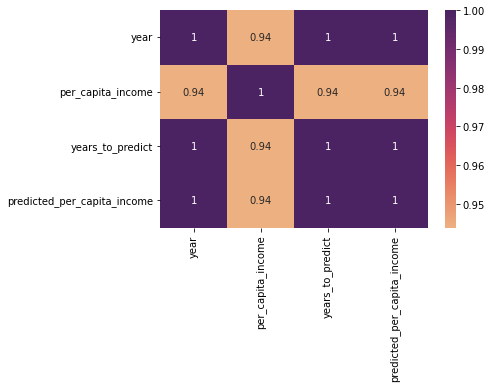

In [19]:
sns.heatmap(canada_per_capita_income.corr(), annot = True, cmap = "flare")